In [ ]:
#start implementing
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving btc_rev.csv to btc_rev (1).csv


In [ ]:
#get and show the data
df = pd.read_csv("btc_rev.csv")
print(df)

                  Date      Open      High  ...     Close        Volume  Adj Close
0     22-04-2021 00:00  53787.62  54275.48  ...  54070.00  2.605339e+08   54070.00
1     22-04-2021 01:00  54070.00  54638.00  ...  53911.88  1.522568e+08   53911.88
2     22-04-2021 02:00  53911.88  53958.56  ...  53760.82  4.558250e+08   53760.82
3     22-04-2021 03:00  53760.81  54150.00  ...  53497.09  2.386448e+08   53497.09
4     22-04-2021 04:00  53494.63  54356.79  ...  54271.67  1.697920e+08   54271.67
...                ...       ...       ...  ...       ...           ...        ...
2177  21-07-2021 20:00  31627.58  31936.10  ...  31796.90  1.099202e+08   31796.90
2178  21-07-2021 21:00  31796.90  31967.77  ...  31835.03  4.276228e+07   31835.03
2179  21-07-2021 22:00  31835.02  32163.97  ...  32114.12  6.257123e+07   32114.12
2180  21-07-2021 23:00  32114.12  32247.63  ...  32144.51  9.098540e+07   32144.51
2181  22-07-2021 00:00  32144.51  32207.72  ...  32200.01  3.384196e+07   32200.01

[21

In [ ]:
prediction_days = 24

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

In [ ]:
#training_set = df_train.values
#training_set = MinMaxScaler.fit_transform(training_set)

#x_train = training_set[0:len(training_set)-1]
#y_train = training_set[1:len(training_set)]
#x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [ ]:
#scal data
scaler=MinMaxScaler(feature_range=(-1,1))
training_set= scaler.fit_transform(df_train['Close'].values.reshape(-1,1))
x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))
#print(scalleddf)


In [ ]:
num_units = 4
activation_function = 'relu'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 100

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/100
432/432 [==============================] - 23s 1ms/step - loss: 0.3216
Epoch 2/100
432/432 [==============================] - 1s 2ms/step - loss: 0.1197
Epoch 3/100
432/432 [==============================] - 1s 1ms/step - loss: 0.0493
Epoch 4/100
432/432 [==============================] - 1s 1ms/step - loss: 0.0251
Epoch 5/100
432/432 [==============================] - 1s 1ms/step - loss: 0.0110
Epoch 6/100
432/432 [==============================] - 1s 1ms/step - loss: 0.0059
Epoch 7/100
432/432 [==============================] - 1s 1ms/step - loss: 0.0034
Epoch 8/100
432/432 [==============================] - 1s 1ms/step - loss: 0.0019
Epoch 9/100
432/432 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 10/100
432/432 [==============================] - 1s 1ms/step - loss: 9.6846e-04
Epoch 11/100
432/432 [==============================] - 1s 1ms/step - loss: 9.9954e-04
Epoch 12/100
432/432 [==============================] - 1s 1ms/step - loss: 9.6333e-04


In [ ]:
#testing and prediction
test_set=df_test.values
test_set=scaler.fit_transform(df_test['Close'].values.reshape(-1,1))

inputs=np.reshape(test_set,(len(test_set),1))
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)
predicted_price=scaler.inverse_transform(predicted_price)
#print(df_test['Close'].values)
#print(predicted_price)

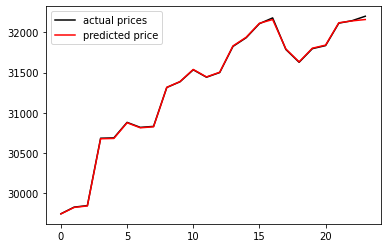

In [ ]:
#data visualisation
plt.plot(df_test['Close'].values, color='black',label='actual prices')
plt.plot(predicted_price, color='red', label='predicted price')
#plt.title(f'{crypto} price prediction')
plt.xlabel=('Time')
plt.ylabel=('Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#creating a 2d array with the first value date 
#and 2nd value 24hrs predicted closing value like so
#[[date, closing price],[date, closing price],...]
#in this 2d array, first 120 rows will be last 5 day's values[date, closing values]
#and last 24 values will be predicted values[date, closing values]
#so there will be total 120+24 = 144 rows

#getting the list of last 144 dates from the csv file
date_list = np.array(df['Date'])[-144:]
print("date list", date_list)
#print(date_list.size)

cp_list = np.array(df['Close'])[-144:]
print("cp list: ", cp_list)
#print(cp_list.size)



date list ['16-07-2021 01:00' '16-07-2021 02:00' '16-07-2021 03:00'
 '16-07-2021 04:00' '16-07-2021 05:00' '16-07-2021 06:00'
 '16-07-2021 07:00' '16-07-2021 08:00' '16-07-2021 09:00'
 '16-07-2021 10:00' '16-07-2021 11:00' '16-07-2021 12:00'
 '16-07-2021 13:00' '16-07-2021 14:00' '16-07-2021 15:00'
 '16-07-2021 16:00' '16-07-2021 17:00' '16-07-2021 18:00'
 '16-07-2021 19:00' '16-07-2021 20:00' '16-07-2021 21:00'
 '16-07-2021 22:00' '16-07-2021 23:00' '17-07-2021 00:00'
 '17-07-2021 01:00' '17-07-2021 02:00' '17-07-2021 03:00'
 '17-07-2021 04:00' '17-07-2021 05:00' '17-07-2021 06:00'
 '17-07-2021 07:00' '17-07-2021 08:00' '17-07-2021 09:00'
 '17-07-2021 10:00' '17-07-2021 11:00' '17-07-2021 12:00'
 '17-07-2021 13:00' '17-07-2021 14:00' '17-07-2021 15:00'
 '17-07-2021 16:00' '17-07-2021 17:00' '17-07-2021 18:00'
 '17-07-2021 19:00' '17-07-2021 20:00' '17-07-2021 21:00'
 '17-07-2021 22:00' '17-07-2021 23:00' '18-07-2021 00:00'
 '18-07-2021 01:00' '18-07-2021 02:00' '18-07-2021 03:00'
 '18

In [ ]:
formatted_prediction = []

#this is the list of first 120 rows of existing data
for i in range(120):
  formatted_prediction.append([date_list[i], cp_list[i]])

print(formatted_prediction)
print(len(formatted_prediction))

[['16-07-2021 01:00', 31808.4], ['16-07-2021 02:00', 31904.26], ['16-07-2021 03:00', 31914.89], ['16-07-2021 04:00', 31907.57], ['16-07-2021 05:00', 31797.02], ['16-07-2021 06:00', 31609.14], ['16-07-2021 07:00', 31774.49], ['16-07-2021 08:00', 31473.0], ['16-07-2021 09:00', 31399.99], ['16-07-2021 10:00', 31305.87], ['16-07-2021 11:00', 31086.53], ['16-07-2021 12:00', 31714.06], ['16-07-2021 13:00', 31765.8], ['16-07-2021 14:00', 31860.93], ['16-07-2021 15:00', 32127.39], ['16-07-2021 16:00', 32065.37], ['16-07-2021 17:00', 32055.24], ['16-07-2021 18:00', 31956.38], ['16-07-2021 19:00', 31911.34], ['16-07-2021 20:00', 31819.98], ['16-07-2021 21:00', 31719.52], ['16-07-2021 22:00', 31578.31], ['16-07-2021 23:00', 31383.87], ['17-07-2021 00:00', 31636.52], ['17-07-2021 01:00', 31386.53], ['17-07-2021 02:00', 31336.08], ['17-07-2021 03:00', 31306.56], ['17-07-2021 04:00', 31387.84], ['17-07-2021 05:00', 31486.95], ['17-07-2021 06:00', 31580.01], ['17-07-2021 07:00', 31513.64], ['17-07-20

In [ ]:

for i in range(24):
  formatted_prediction.append([date_list[i+120], predicted_price[i]])

print(formatted_prediction)
print(len(formatted_prediction))

[['16-07-2021 01:00', 31808.4], ['16-07-2021 02:00', 31904.26], ['16-07-2021 03:00', 31914.89], ['16-07-2021 04:00', 31907.57], ['16-07-2021 05:00', 31797.02], ['16-07-2021 06:00', 31609.14], ['16-07-2021 07:00', 31774.49], ['16-07-2021 08:00', 31473.0], ['16-07-2021 09:00', 31399.99], ['16-07-2021 10:00', 31305.87], ['16-07-2021 11:00', 31086.53], ['16-07-2021 12:00', 31714.06], ['16-07-2021 13:00', 31765.8], ['16-07-2021 14:00', 31860.93], ['16-07-2021 15:00', 32127.39], ['16-07-2021 16:00', 32065.37], ['16-07-2021 17:00', 32055.24], ['16-07-2021 18:00', 31956.38], ['16-07-2021 19:00', 31911.34], ['16-07-2021 20:00', 31819.98], ['16-07-2021 21:00', 31719.52], ['16-07-2021 22:00', 31578.31], ['16-07-2021 23:00', 31383.87], ['17-07-2021 00:00', 31636.52], ['17-07-2021 01:00', 31386.53], ['17-07-2021 02:00', 31336.08], ['17-07-2021 03:00', 31306.56], ['17-07-2021 04:00', 31387.84], ['17-07-2021 05:00', 31486.95], ['17-07-2021 06:00', 31580.01], ['17-07-2021 07:00', 31513.64], ['17-07-20